# Statistical efficiency plot

This notebook generates the plot that illustrates the (empirically measured) statistical efficiency of various estimators.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import thesis

from matplotlib.ticker import ScalarFormatter, NullFormatter

In [3]:
np.random.seed(24)

In [4]:
thesis.setup_plotting()

Thesis settings loaded!


In [5]:
log_n_items = 10  # Base-2 logarithm of number of ite
sizes = np.logspace(1, log_n_items, num=log_n_items, endpoint=True, base=2, dtype=int)

In [6]:
with open("data/statistical-efficiency.pickle", "rb") as f:
    res = pickle.load(f)

/Users/maystre/.virtualenvs/thesis/lib/python3.5/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


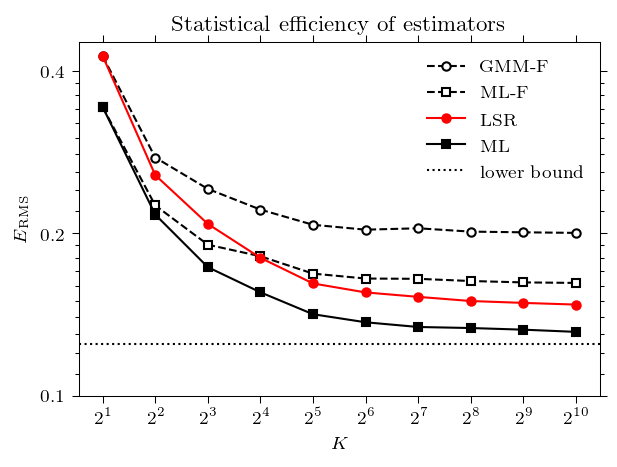

In [7]:
fig, ax = plt.subplots(figsize=(4.25, 3.25))

ax.loglog(res["sizes"], res["GMM-F"], basex=2, label="GMM-F",
        ls="--", color="black", marker="o", markerfacecolor="white")
ax.loglog(res["sizes"], res["ML-F"], basex=2, label="ML-F",
        ls="--", color="black", marker="s", markerfacecolor="white")
ax.loglog(res["sizes"], res["LSR"], basex=2, label="LSR",
        color="r", marker="o")
ax.loglog(res["sizes"], res["ML"], basex=2, label="ML",
        color="k", marker="s")
ax.axhline(res["XLB"], label="lower bound", color="k", ls=":")

ax.set_xticks(sizes)
ax.set_yticks((0.1,0.2,0.4))
mticks = np.concatenate((np.linspace(0.1, 0.19, 10), np.linspace(0.2, 0.38, 10)))
ax.set_yticks(mticks, minor=True)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_minor_formatter(NullFormatter())

ax.legend()
ax.set_xlabel("$K$")
ax.set_ylabel(r"$E$\textsubscript{RMS}")
ax.set_title("Statistical efficiency of estimators")

fig.savefig("efficiency.pdf")